# 01장 입출력과 GUI 

In [1]:
# 설치 하기
! pip install opencv-python

You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# 설치 확인
import cv2
print(cv2.__version__)

4.0.0


In [5]:
# 예제코드 및 데이터 다운로드
# https://github.com/PacktPublishing/OpenCV-3-Computer-Vision-with-Python-Cookbook

## 파일에서 이미지 읽어오기

테스트 이미지 : ../data/Lena.png

![이미지 이름](../data/Lena.png) 

In [1]:
import argparse
import cv2

#parser = argparse.ArgumentParser()
#parser.add_argument('--path', default='../data/Lena.png', help='Image path.')
#params = parser.parse_args()
#img = cv2.imread(params.path)

path = '../data/Lena.png'
img = cv2.imread(path)

In [14]:
# 이미지를 제대로 로딩했는지 체크
assert img is not None 

#print('read {}'.format(params.path))
print('read {}'.format(path))
print('shape:', img.shape)
print('dtype:', img.dtype)

read ../data/Lena.png
shape: (512, 512, 3)
dtype: uint8


In [15]:
# 그레이스케일로 변환하여 읽어오기 
#img = cv2.imread(params.path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
assert img is not None
#print('read {} as grayscale'.format(params.path))
print('read {} as grayscale'.format(path))
print('shape:', img.shape)
print('dtype:', img.dtype)

read ../data/Lena.png as grayscale
shape: (512, 512)
dtype: uint8


- shape: (512, 512, 3)  =>  이미지 높이, 이미지 너비, 색상 채널수 
- shape: (512, 512)     => 그레이스케일이기 때문에 색상 채널수가 없음.

## 간단한 이미지 변환 : 크기 조절 및 뒤집기

In [31]:
img = cv2.imread(path)
print('original image shape:', img.shape)

original image shape: (512, 512, 3)


In [27]:
# cv2.resize함수로 크기 조절
width, height = 128, 256
resized_img = cv2.resize(img, (width, height))
print('resized to 128x256 image shape:', resized_img.shape)

resized to 128x256 image shape: (256, 128, 3)


In [29]:
# 이미지의 원본 너비와 높에에 대한 배수로 크기 조절
w_mult, h_mult = 0.25, 0.5
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult)
print('image shape:', resized_img.shape)

image shape: (256, 128, 3)


In [32]:
# 최근접 이웃 보간법을 사용해 크기 조절
w_mult, h_mult = 2, 4
resized_img = cv2.resize(img, (0, 0), resized_img, w_mult, h_mult, cv2.INTER_NEAREST)
print('image shape:', resized_img.shape)

image shape: (2048, 1024, 3)


In [36]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

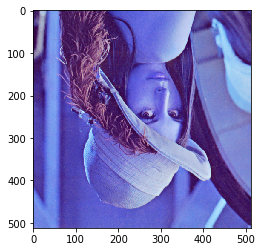

In [37]:
# cv2.flip함수의 마지막 인자로 0을 전달해 수평인 x축을 따라 이미지 뒤집기 
img_flip_along_x = cv2.flip(img, 0)

plt.imshow(img_flip_along_x)
plt.show()

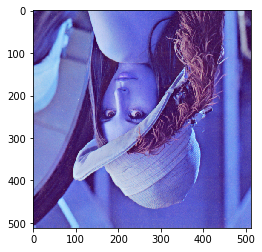

In [38]:
# 1값을 전달해 수직인 y축에 따라 이미지 뒤집기
img_flip_along_x_along_y = cv2.flip(img_flip_along_x, 1)

plt.imshow(img_flip_along_x_along_y)
plt.show()

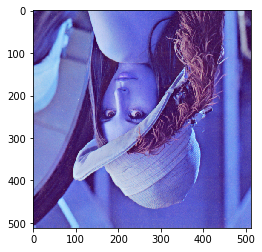

In [39]:
# 음수값을 함수에 전달해 x와 y 축에 동시에 뒤집기
img_flipped_xy = cv2.flip(img, -1)

plt.imshow(img_flipped_xy)
plt.show()

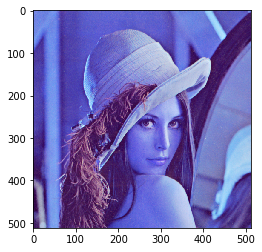

In [41]:
# 원본
plt.imshow(img)
plt.show()

## 손실 및 무손실 압축을 사용한 이미지 저장

In [43]:
img = cv2.imread(path)

In [45]:
# 낮은 압축률로 이미지를 저장 => 파일크기 커짐
cv2.imwrite('../data/Lena_compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# 이미지를 저장하고 다시 불러들여 원본과 동일한지 비교
saved_img = cv2.imread('../data/Lena_compressed.png')
assert saved_img.all() == img.all()

In [48]:
! dir ..\data\Lena*.png

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9495-1634

 D:\Work_Git\serving_bio\data 디렉터리

2018-03-20  오전 07:17           473,831 Lena.png
2019-02-14  오후 09:22           788,279 Lena_compressed.png
2018-03-20  오전 07:17           473,345 Lena_rotated.png
               3개 파일           1,735,455 바이트
               0개 디렉터리  28,160,126,976 바이트 남음


In [49]:
# 이미지를 낮은 화질로 저장  - 파일크기 작아짐
cv2.imwrite('../data/Lena_compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 0])

True

In [1]:
! dir ..\data\Lena*

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9495-1634

 D:\Work_Git\serving_bio\data 디렉터리

2018-03-20  오전 07:17           473,831 Lena.png
2019-02-14  오후 09:26             5,730 Lena_compressed.jpg
2019-02-14  오후 09:22           788,279 Lena_compressed.png
2018-03-20  오전 07:17           473,345 Lena_rotated.png
               4개 파일           1,741,185 바이트
               0개 디렉터리  28,160,114,688 바이트 남음


## OpenCV 창에 이미지 표시

In [1]:
# cmd 
# d:
# cd D:\Work_Git\serving_bio\part01 
# python 
import cv2

path = '../data/Lena.png'
orig = cv2.imread(path)
orig_size = orig.shape[0:2]

cv2.imshow("Original image", orig)
cv2.waitKey(2000)

-1

## OpenCV창에서 버튼 및 탐색바와 같은 UI 요소를 작업

In [ ]:
import cv2, numpy as np

cv2.namedWindow('window')

fill_val = np.array([255, 255, 255], np.uint8)

def trackbar_callback(idx, value):
    fill_val[idx] = value
    
cv2.createTrackbar('R', 'window', 255, 255, lambda v: trackbar_callback(2, v))
cv2.createTrackbar('G', 'window', 255, 255, lambda v: trackbar_callback(1, v))
cv2.createTrackbar('B', 'window', 255, 255, lambda v: trackbar_callback(0, v))

while True:
    image = np.full((500, 500, 3), fill_val)
    cv2.imshow('window', image)
    key = cv2.waitKey(3)
    if key == 27: 
        break

cv2.destroyAllWindows()

## 2D 프리미티브 그리기 : 마커, 선, 타원, 사각형 및 텍스트 

In [19]:
import cv2, random
import matplotlib.pyplot as plt
from matplotlib.image import imread

path = '../data/Lena.png'
image = cv2.imread(path)
w, h = image.shape[1], image.shape[0]


# 이미지 내부에서 임의의 점을 반환하는 함수
def rand_pt(mult=1.):
    return (random.randrange(int(w*mult)),
            random.randrange(int(h*mult)))

In [20]:
# 원그리기
cv2.circle(image, rand_pt(), 40, (255, 0, 0))
cv2.circle(image, rand_pt(), 5, (255, 0, 0), cv2.FILLED)
cv2.circle(image, rand_pt(), 40, (255, 85, 85), 2)
cv2.circle(image, rand_pt(), 40, (255, 170, 170), 2, cv2.LINE_AA)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

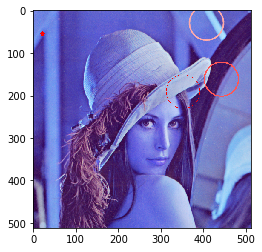

In [21]:
plt.imshow(image)
plt.show()

In [22]:
# 선 그리기 
cv2.line(image, rand_pt(), rand_pt(), (0, 255, 0))
cv2.line(image, rand_pt(), rand_pt(), (85, 255, 85), 3)
cv2.line(image, rand_pt(), rand_pt(), (170, 255, 170), 3, cv2.LINE_AA)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

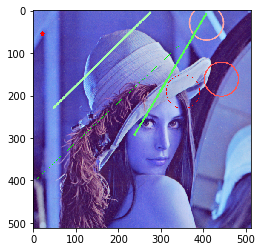

In [23]:
plt.imshow(image)
plt.show()

In [24]:
# 화살표 선 그리기
cv2.arrowedLine(image, rand_pt(), rand_pt(), (0, 0, 255), 3, cv2.LINE_AA)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

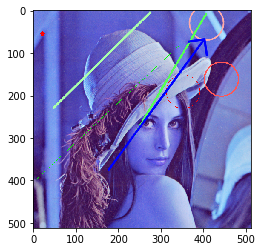

In [25]:
plt.imshow(image)
plt.show()

In [26]:
# 사각형 그리기 
cv2.rectangle(image, rand_pt(), rand_pt(), (255, 255, 0), 3)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

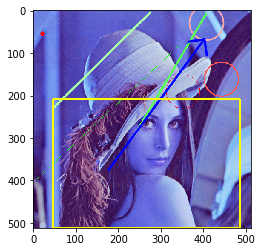

In [27]:
plt.imshow(image)
plt.show()

In [28]:
# 타원 그리기 
cv2.ellipse(image, rand_pt(), rand_pt(0.3), random.randrange(360), 0, 360, (255, 255, 255), 3)

# 문자열 넣기
cv2.putText(image, 'OpenCV', rand_pt(), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [29]:
cv2.imwrite('../data/Len02.jpg', image, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

![](../data/Len02.jpg) 

## 카메라 프레임 캡처 및 표시

In [30]:
import cv2

capture = cv2.VideoCapture(0)

In [31]:
# ESC 키가 입력될때까지 녹화
while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break

Pressed Esc


In [32]:
# 비디오 장치 해재와 창 닫기
capture.release()
cv2.destroyAllWindows()

## 비디오 프레임 스트림 재생

In [36]:
import cv2

capture = cv2.VideoCapture('../data/drop.avi')

In [37]:
while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Reached end of video')
        break

    cv2.imshow('frame', frame)
    key = cv2.waitKey(500)
    if key == 27:
        print('Pressed Esc')
        break
    

Pressed Esc


In [38]:
cv2.destroyAllWindows()

## 프레임 스트림 프로퍼티 얻기

In [39]:
import cv2

def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Created capture:', ' '.join(map(str, args)))
    print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))

In [40]:
# 비디오 파일에 대한 정보
print_capture_properties('../data/drop.avi')

Created capture: ../data/drop.avi
Frame count: 182
Frame width: 256
Frame height: 240
Frame rate: 30.0


In [41]:
# 카메라 캡처 객체 정보
print_capture_properties(0)

Created capture: 0
Frame count: -1
Frame width: 640
Frame height: 480
Frame rate: 30.0


## 프레임 스트림을 비디오로 저장

In [42]:
import cv2

capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width:', frame_width)
print('Frame height:', frame_height)

Frame width: 640
Frame height: 480


In [43]:
video = cv2.VideoWriter('../data/captured_video.avi', cv2.VideoWriter_fourcc(*'X264'),
                        25, (frame_width, frame_height))

In [44]:
# ESC 키 입력될때까지 저장 
while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    video.write(frame)
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break 

Pressed Esc


In [45]:
capture.release()
video.release()
cv2.destroyAllWindows()

## 비디오 파일의 프레임 간 이동

In [65]:
import cv2

capture = cv2.VideoCapture('../data/drop.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

Frame count: 182


In [60]:
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame0', frame)
cv2.waitKey()

Position: 101


0

In [62]:
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame1', frame)
cv2.waitKey()

Position: 103


27

In [66]:
capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
_, frame = capture.read()
cv2.imshow('frame100', frame)
cv2.waitKey()

Position: 100


97

In [67]:
cv2.destroyAllWindows()